           xl         xu        xr        f(xl)        f(xu)       f(xr)  \
0  -10.000000  20.000000  5.000000  1600.000000 -1100.000000 -425.000000   
1  -10.000000   5.000000 -2.500000  1600.000000  -425.000000  418.750000   
2   -2.500000   5.000000  1.250000   418.750000  -425.000000  -45.312500   
3   -2.500000   1.250000 -0.625000   418.750000   -45.312500  176.171875   
4   -0.625000   1.250000  0.312500   176.171875   -45.312500   62.792969   
5    0.312500   1.250000  0.781250    62.792969   -45.312500    8.081055   
6    0.781250   1.250000  1.015625     8.081055   -45.312500  -18.780518   
7    0.781250   1.015625  0.898438     8.081055   -18.780518   -5.390930   
8    0.781250   0.898438  0.839844     8.081055    -5.390930    1.334763   
9    0.839844   0.898438  0.869141     1.334763    -5.390930   -2.030659   
10   0.839844   0.869141  0.854492     1.334763    -2.030659   -0.348592   
11   0.839844   0.854492  0.847168     1.334763    -0.348592    0.492924   

      f(xl)

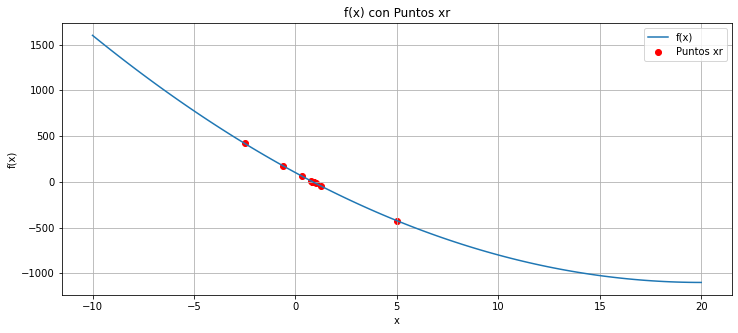

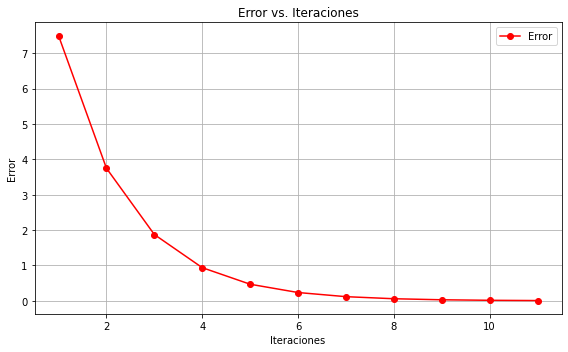

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 3*x**2 - 120*x + 100

def metodo_biseccion(funcion, xl, xu, tolerancia=0.01):
    iteraciones = 0
    xr_anterior = None
    
    # Tabla
    tabla_datos = []
    
    while True:
        xr = (xl + xu) / 2
        error = abs(xr - xr_anterior) if xr_anterior else None
        
        fxl = funcion(xl)
        fxu = funcion(xu)
        fxr = funcion(xr)
        
        fxl_x_fxr = fxl * fxr
        
        tabla_datos.append([xl, xu, xr, fxl, fxu, fxr, fxl_x_fxr, error])
        
        if error and error < tolerancia:
            break
        
        if fxl * fxr < 0:
            xu = xr
        
        if fxl * fxr > 0:            
            xl = xr
            
        if fxl * fxr == 0:
            break
        
        xr_anterior = xr
        iteraciones += 1
    
    tabla = pd.DataFrame(tabla_datos, columns=['xl', 'xu', 'xr', 'f(xl)', 'f(xu)', 'f(xr)', 'f(xl)*f(xr)', 'Error'])
    
    return tabla, xr, iteraciones

# Valores iniciales
xl = -10
xu = 20

tabla, raiz, num_iteraciones = metodo_biseccion(f, xl, xu)

print(tabla)

print(f"La raíz aproximada es {raiz} después de {num_iteraciones} iteraciones.")

# Grafica de la funcion
x_values = np.linspace(min(tabla['xl']), max(tabla['xu']), 100)
y_values = f(x_values)
plt.figure(figsize=(12, 5))
plt.plot(x_values, y_values, label='f(x)')
plt.scatter(tabla['xr'], [f(xr) for xr in tabla['xr']], color='red', label='Puntos xr')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('f(x) con Puntos xr')
plt.legend()
plt.grid(True)

# Gráfico del error
plt.figure(figsize=(8, 5))
plt.plot(range(len(tabla)), tabla['Error'], label='Error', marker='o', color='r')
plt.xlabel('Iteraciones')
plt.ylabel('Error')
plt.title('Error vs. Iteraciones')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()